In [1]:
from dadapy import Data
from dadapy.plot import plot_SLAn, plot_MDS, plot_matrix, get_dendrogram, plot_DecGraph

import pandas as pd
import numpy as np
import pylab as pl

In [2]:
#--- PARAMETERS
nn = 45
md = 1.0
me = 'cosine'
ll = 0.15
mm = 5
night   = '20200314'
release = 'andes'
survey  = 'sv0'
band    = 'b'

In [3]:
df_umap = pd.read_pickle(f'./reduced/{night}/{release}/{survey}/{night}_{release}_{survey}_{band}_spec_nn{nn}_md{md}_{me}.csv')
df_spec = pd.read_pickle(f'./catalog/{night}/{release}/{survey}/{night}_{release}_{survey}_{band}_spec.csv')
df_wave = pd.read_pickle(f'./catalog/{night}/{release}/{survey}/{night}_{release}_{survey}_{band}_wave.csv')

In [4]:
df_umap_np = np.array(df_umap)
data = Data(df_umap_np, verbose=True)

In [10]:
data.compute_distances(maxk = 1000)
data.compute_id_2NN()
data.compute_density_kstarNN()

Computation of distances started
Computation of the distances up to 1000 NNs started
21.34 seconds for computing distances
ID estimation finished: selecting ID of 1.9924949745501408
kstar estimation started, Dthr = 23.92812698
13.75 seconds computing kstar
kstar-NN density estimation started
k-NN density estimation finished


(array([-5.11, -5.09, -5.35, ..., -4.85, -4.64, -4.78]),
 array([0.06, 0.06, 0.05, ..., 0.03, 0.03, 0.03]))

In [11]:
fig = pl.figure(figsize=(10,10))
pl.scatter(df_umap_np[:,0], df_umap_np[:,1],s=15.,alpha=0.9, c = data.log_den,linewidths=0.0)
pl.colorbar()
pl.show()

In [8]:
data.compute_density_kstarNN(Dthr=100)

kstar estimation started, Dthr = 100
15.71 seconds computing kstar
kstar-NN density estimation started
k-NN density estimation finished


(array([-5.05, -5.09, -5.35, ..., -4.85, -4.64, -4.78]),
 array([0.05, 0.05, 0.03, ..., 0.03, 0.03, 0.03]))

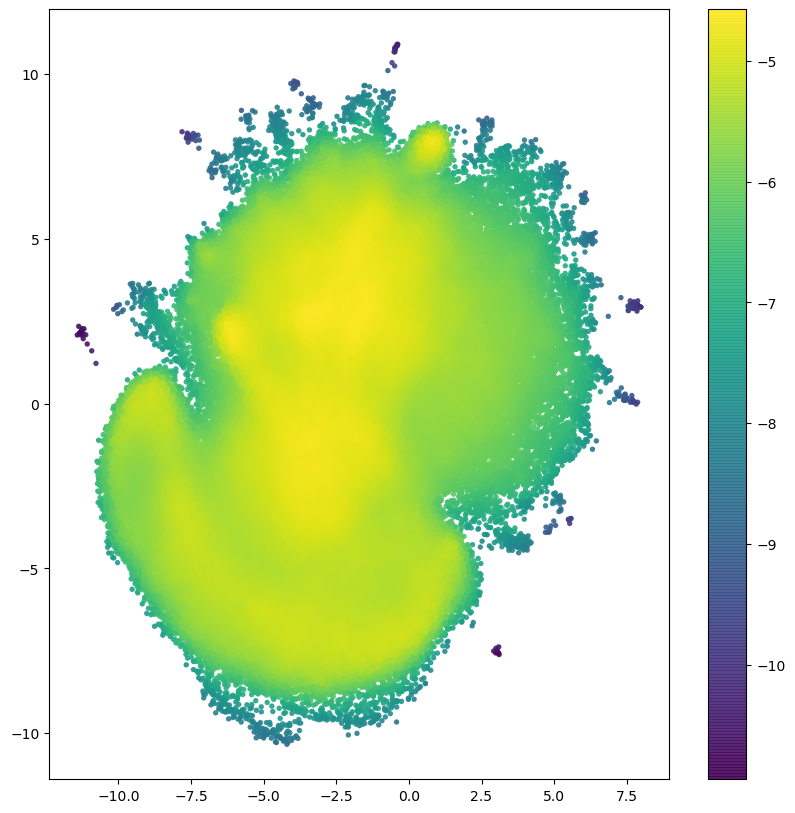

In [9]:
fig = pl.figure(figsize=(10,10))
pl.scatter(df_umap_np[:,0], df_umap_np[:,1],s=15.,alpha=0.9, c = data.log_den,linewidths=0.0)
pl.colorbar()
pl.show()

Number of points for which self.delta needed call to cdist= 24


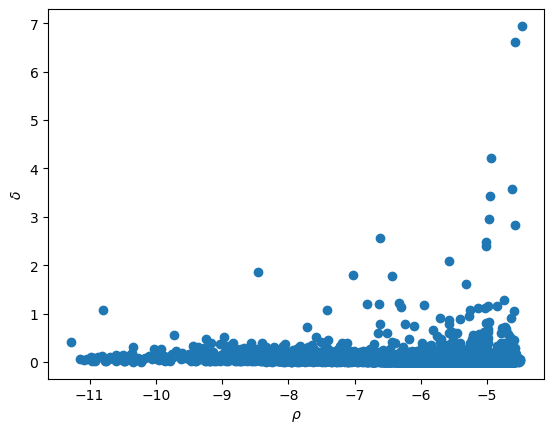

In [7]:
data.compute_DecGraph()
plot_DecGraph(data)

In [8]:
lim = 1.8*np.median(data.log_den)
outliers = df_umap.iloc[data.log_den<lim]
lim, sum(data.log_den<lim)

(-9.285764487805677, 102)

In [9]:
index = outliers.index

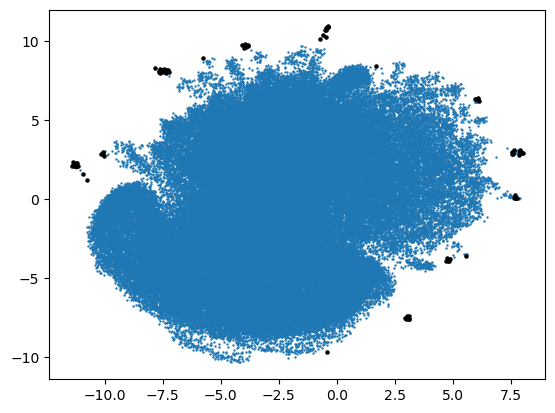

In [10]:
pl.scatter(df_umap_np[:,0], df_umap_np[:,1], s=0.5)
pl.scatter(df_umap.iloc[data.log_den<lim]['X_UMAP'], df_umap.iloc[data.log_den<lim]['Y_UMAP'], color='k', s=5)

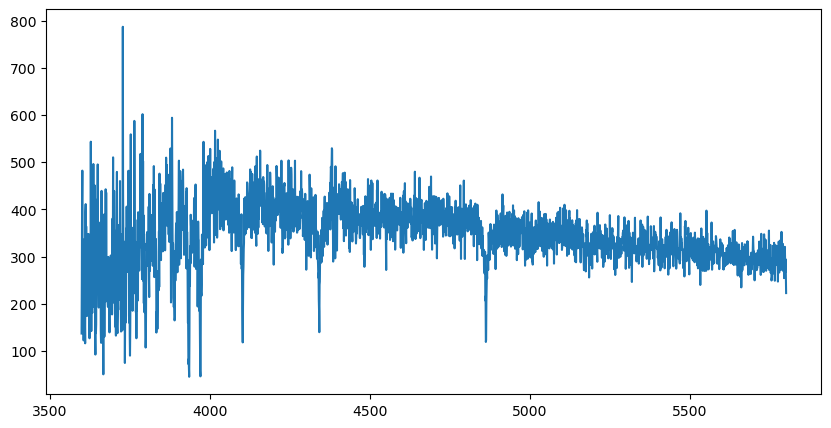

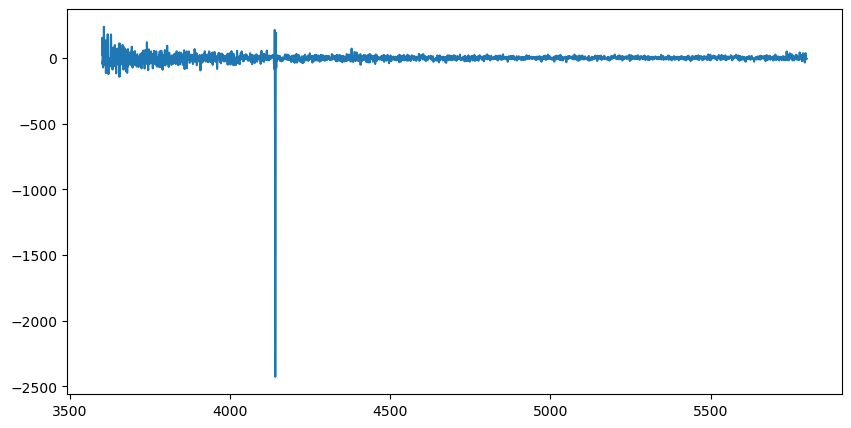

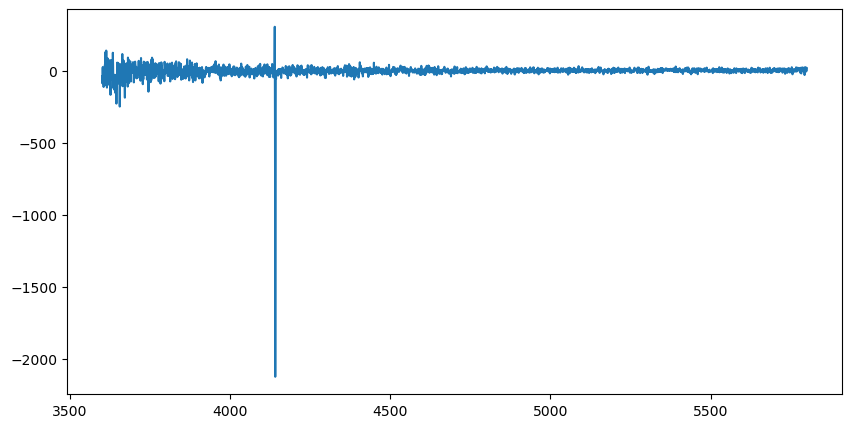

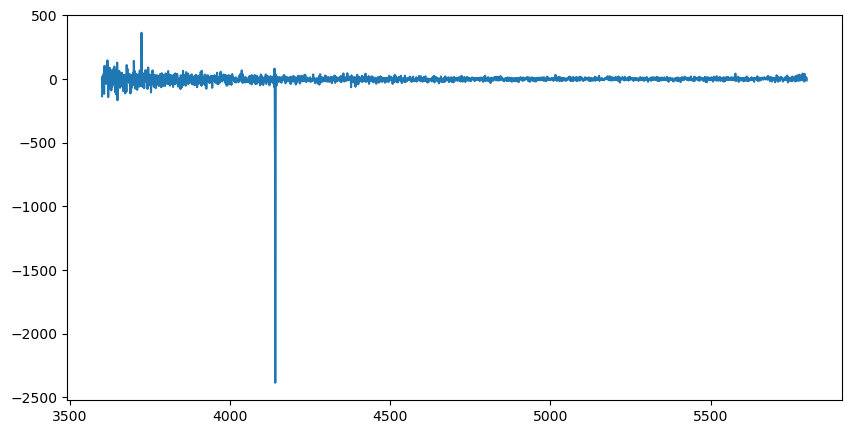

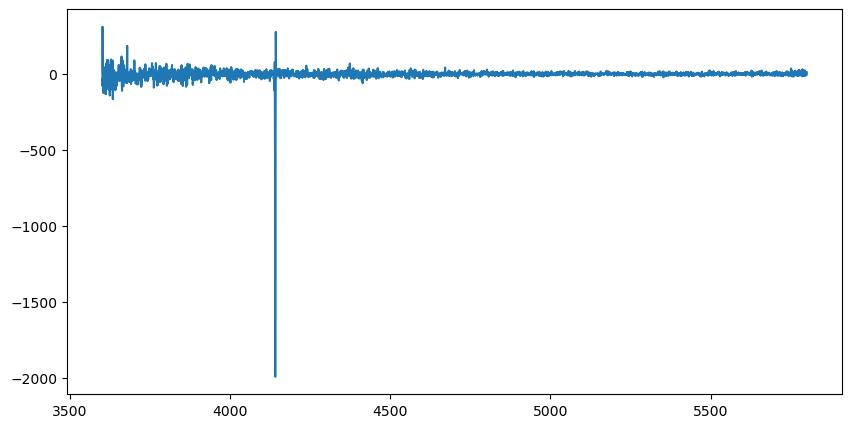

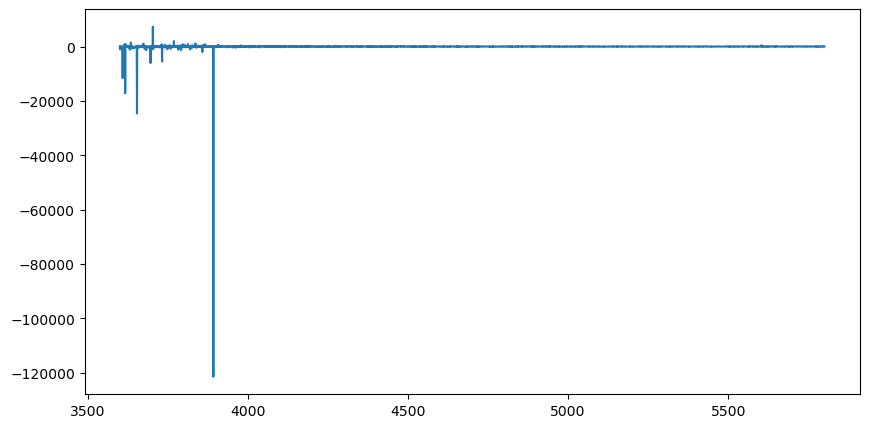

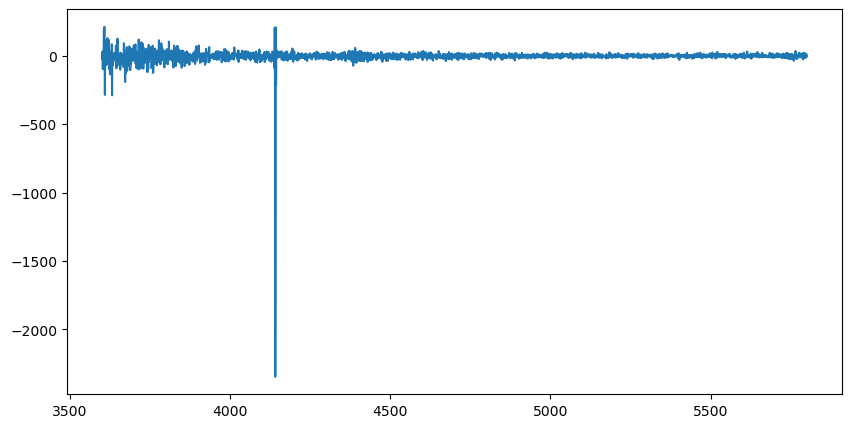

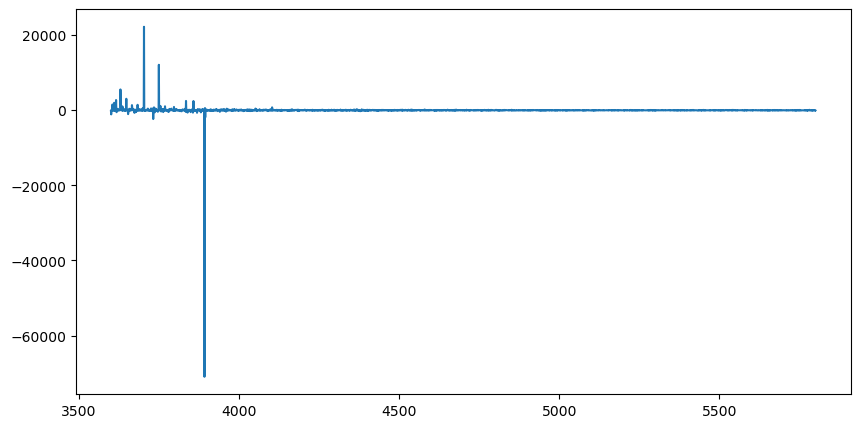

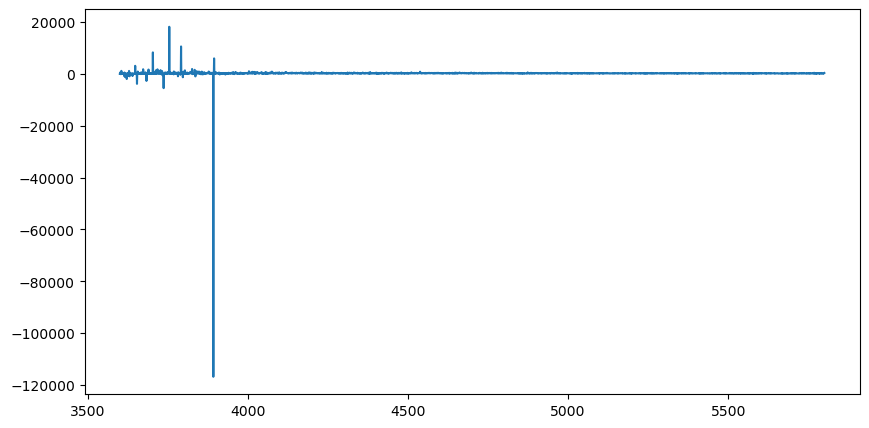

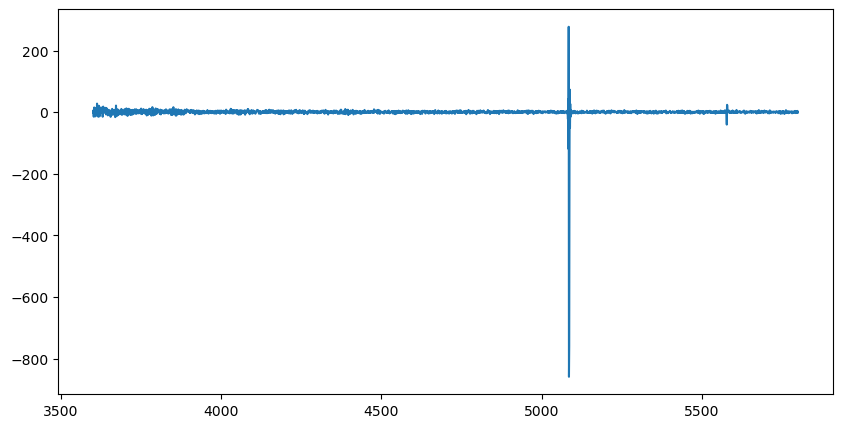

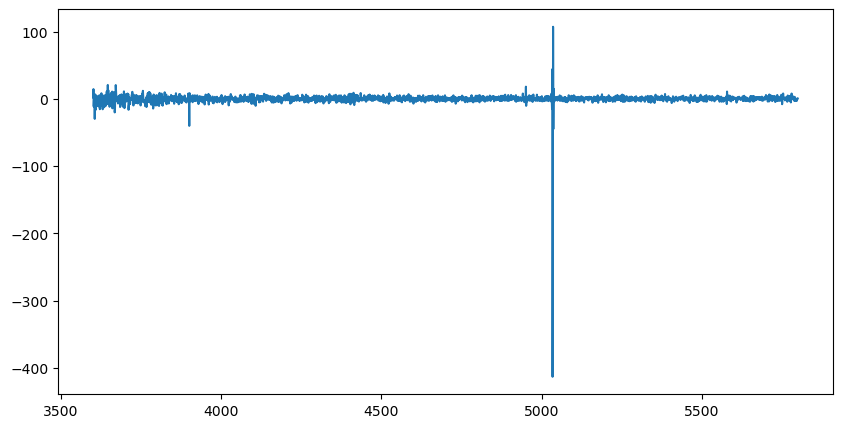

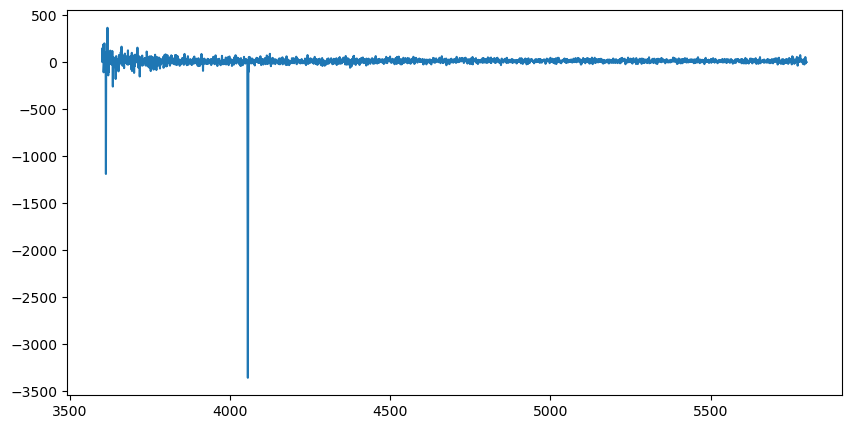

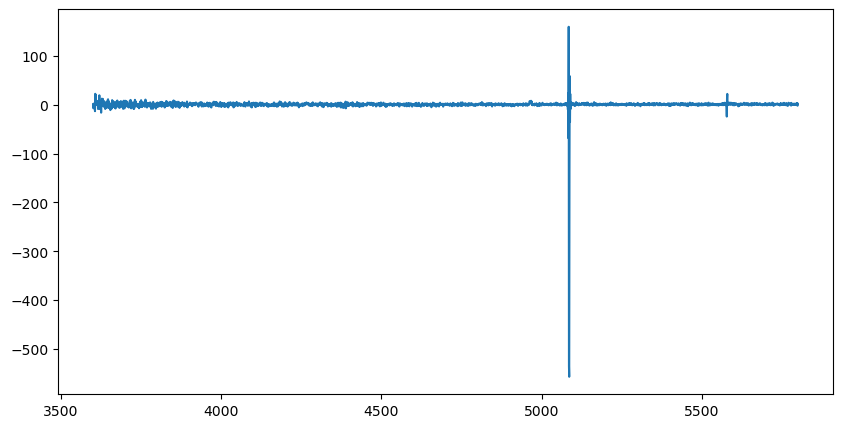

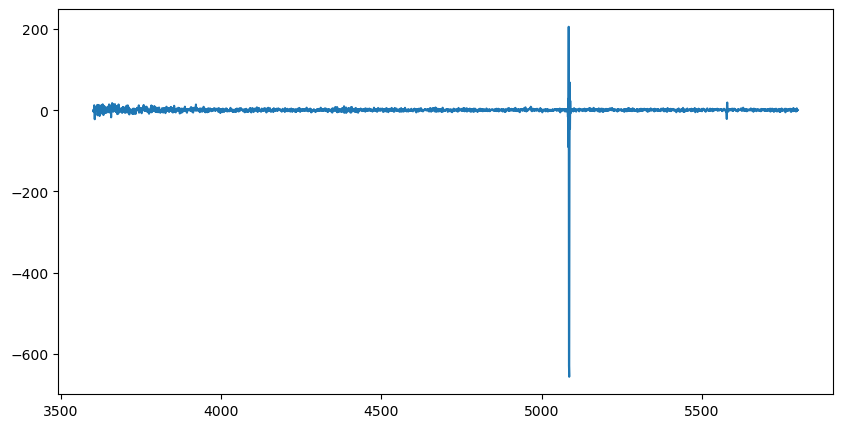

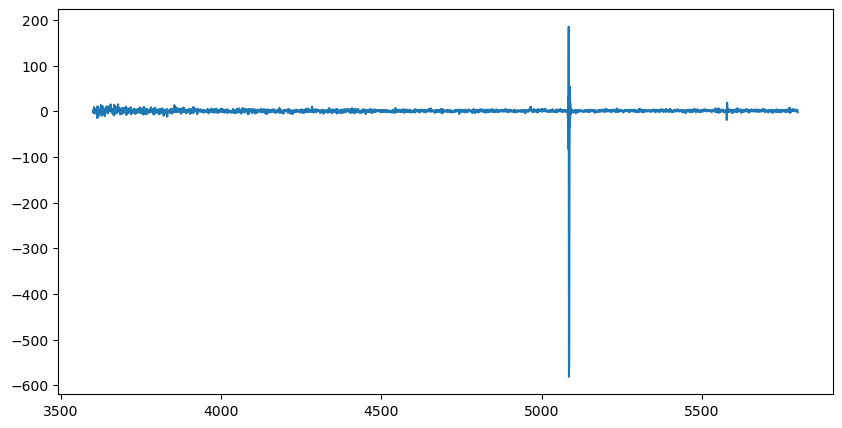

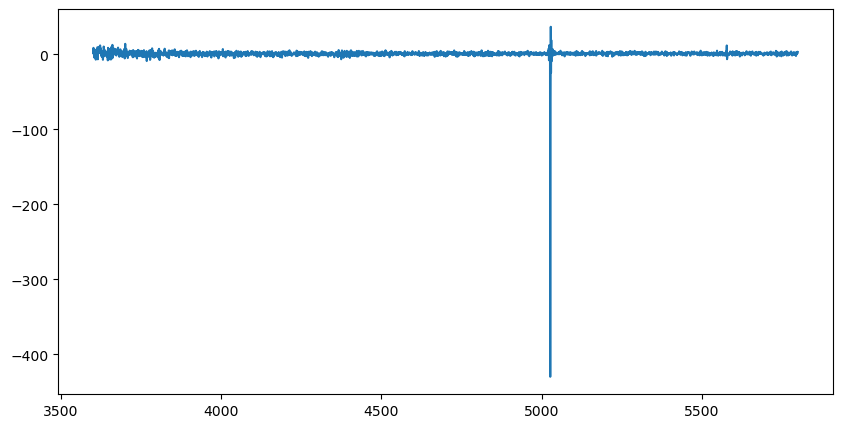

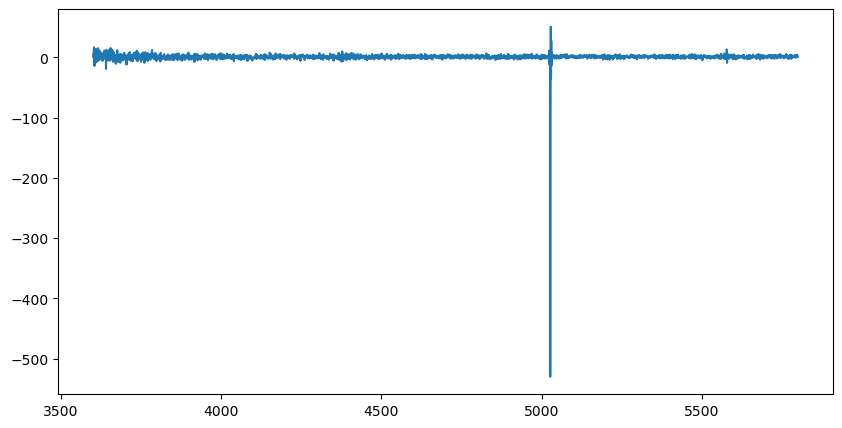

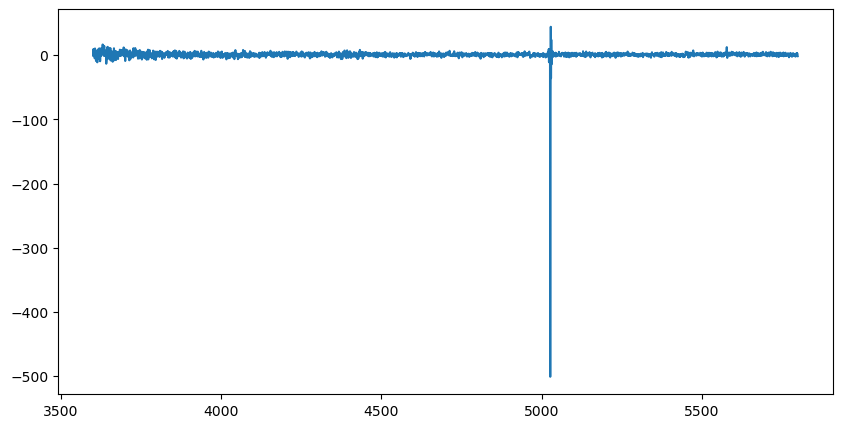

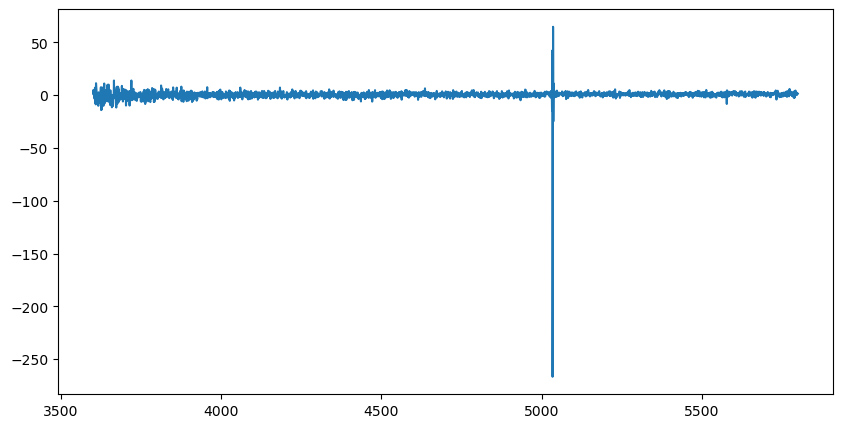

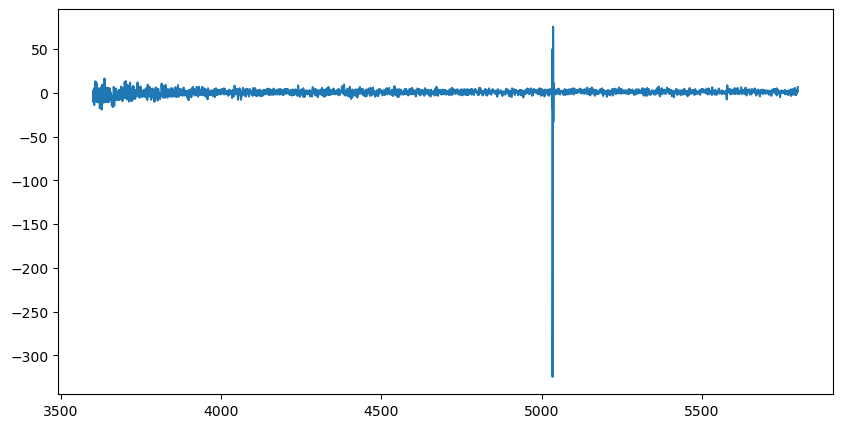

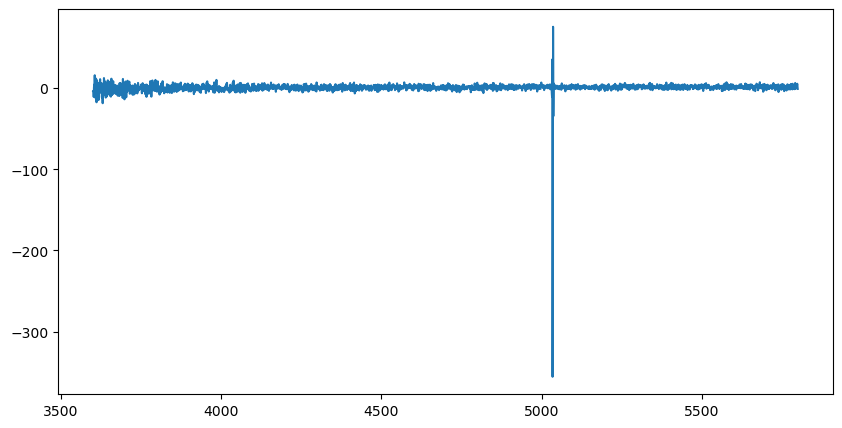

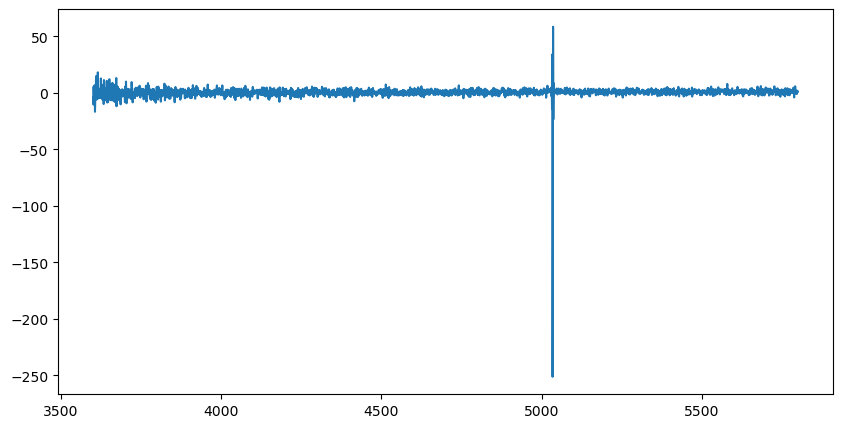

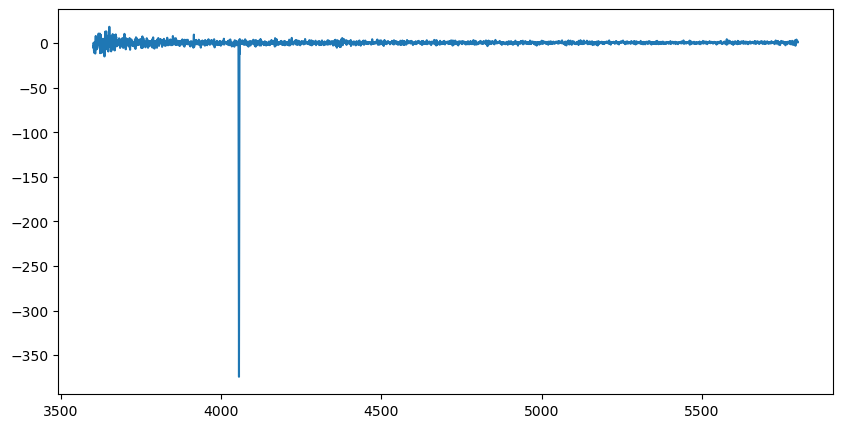

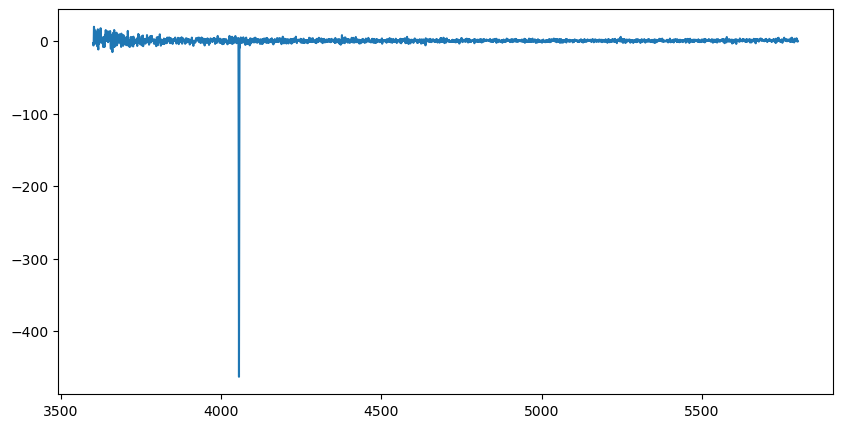

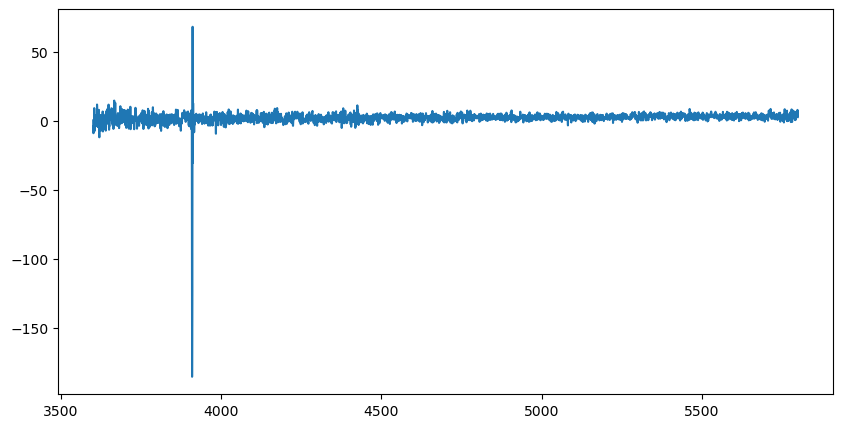

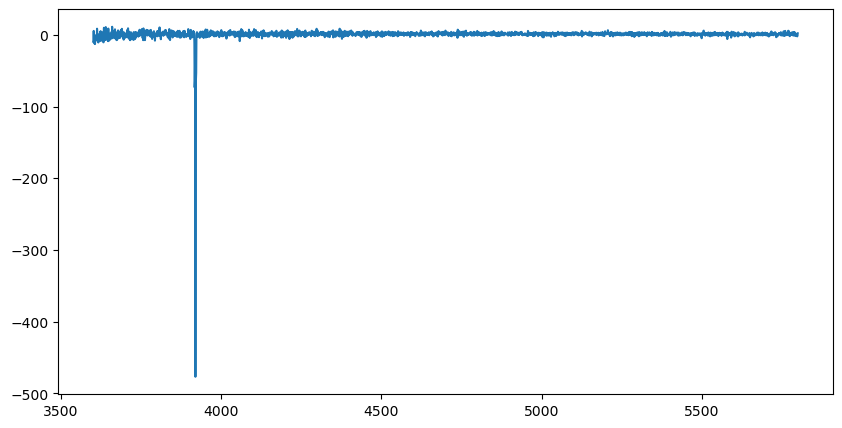

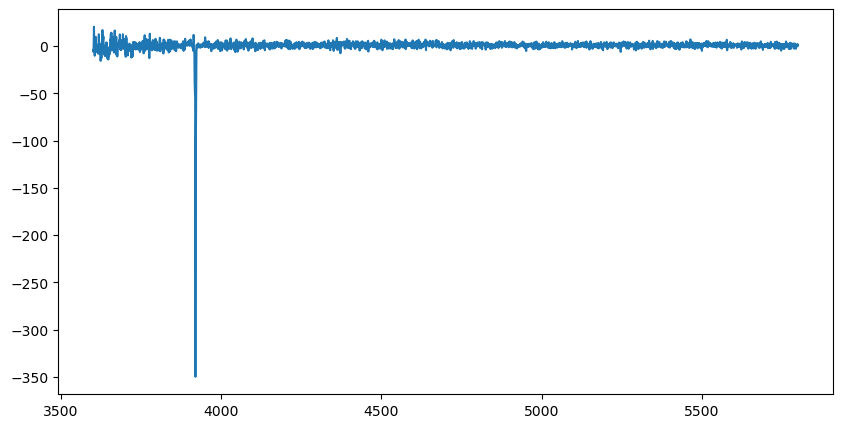

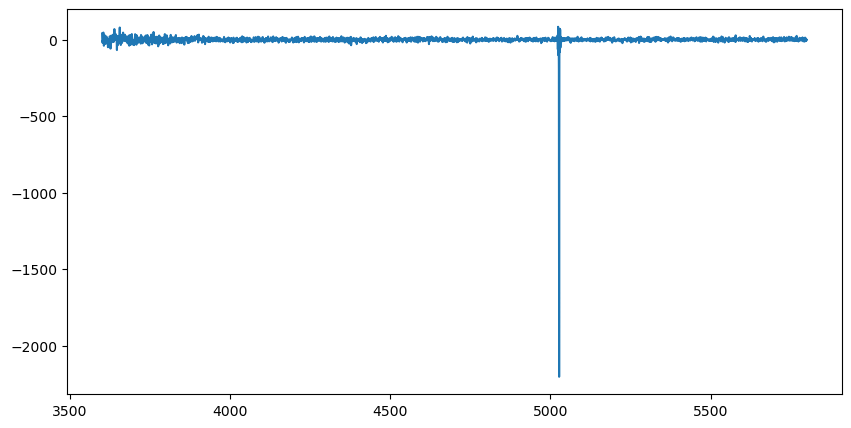

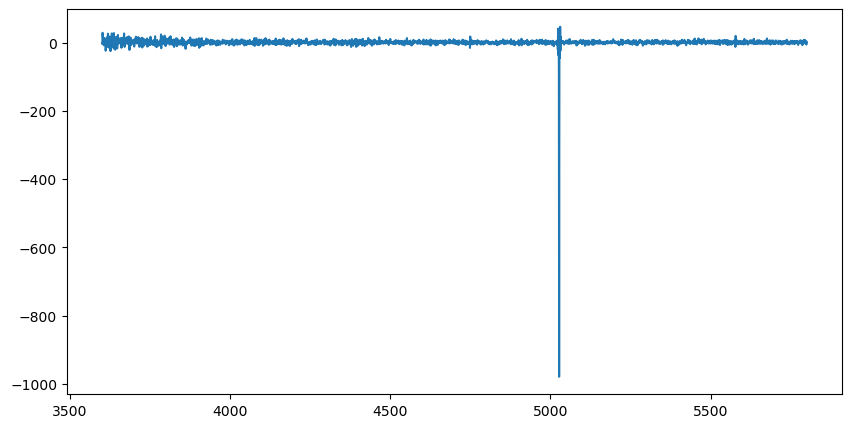

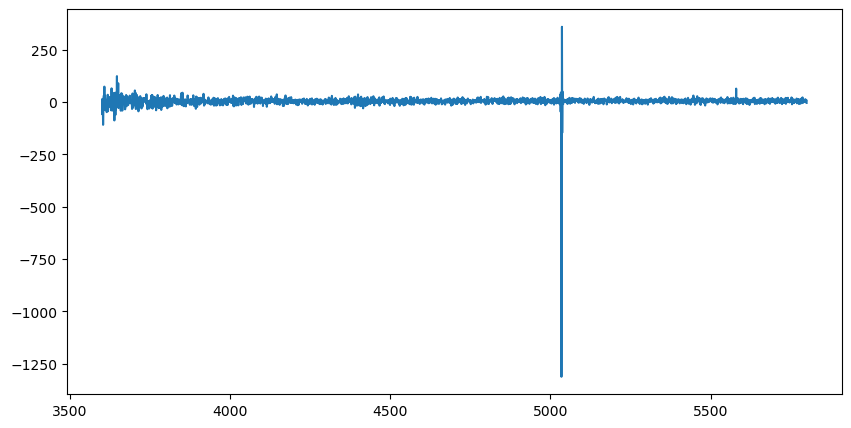

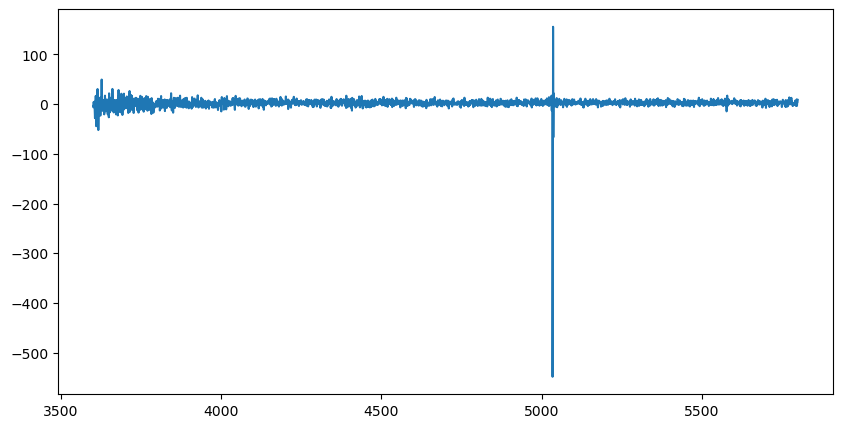

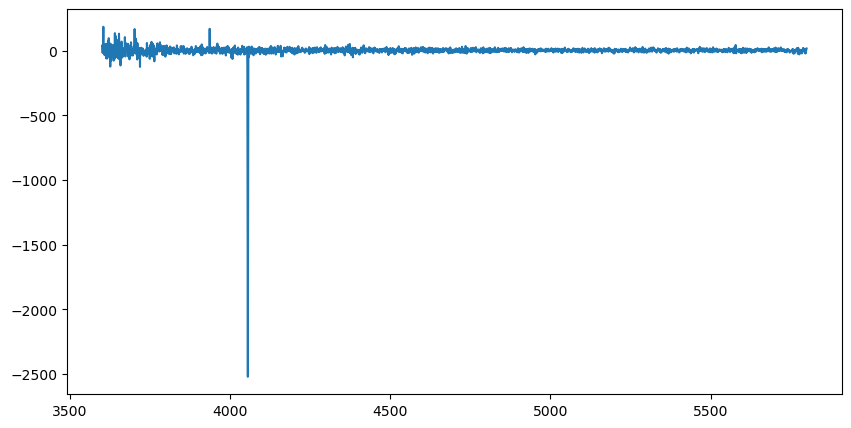

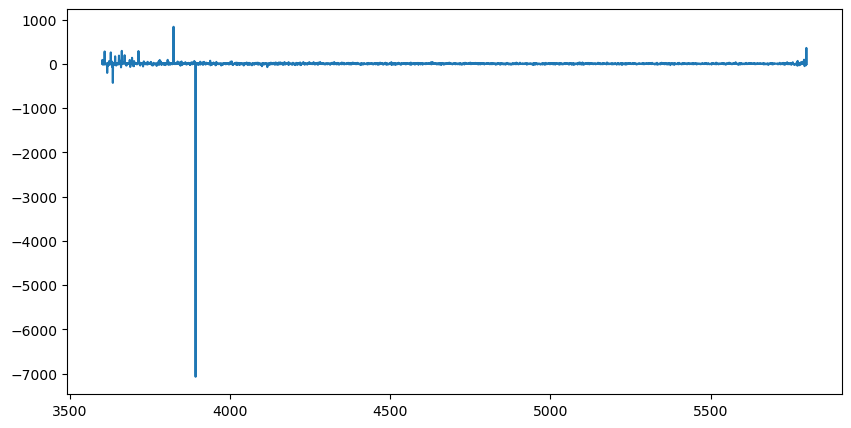

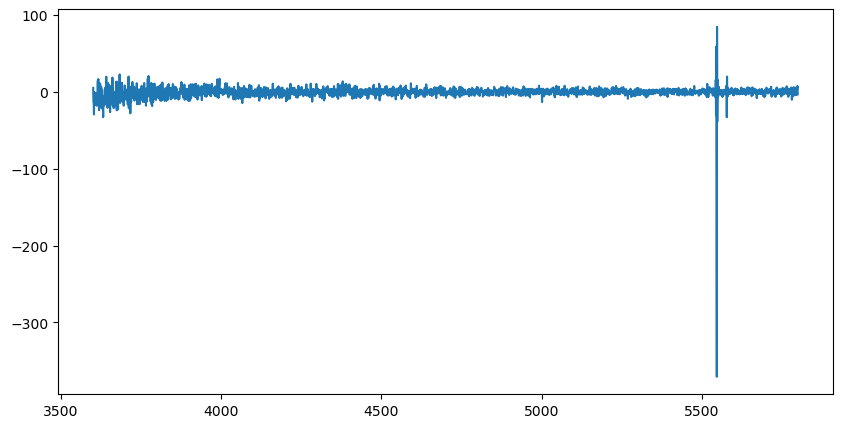

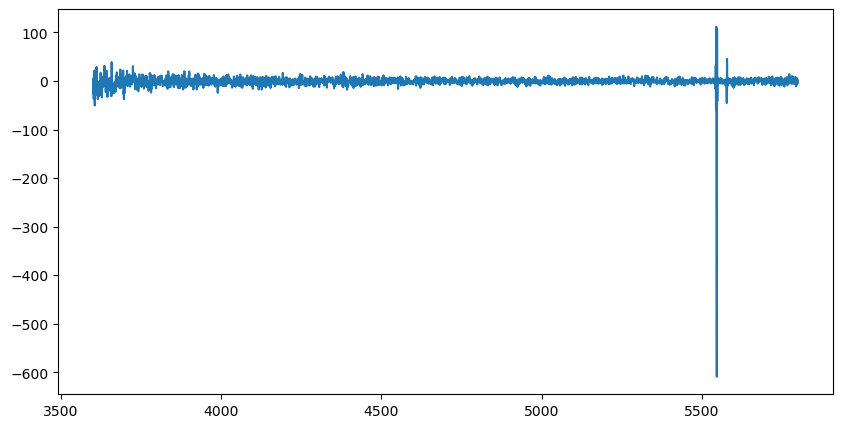

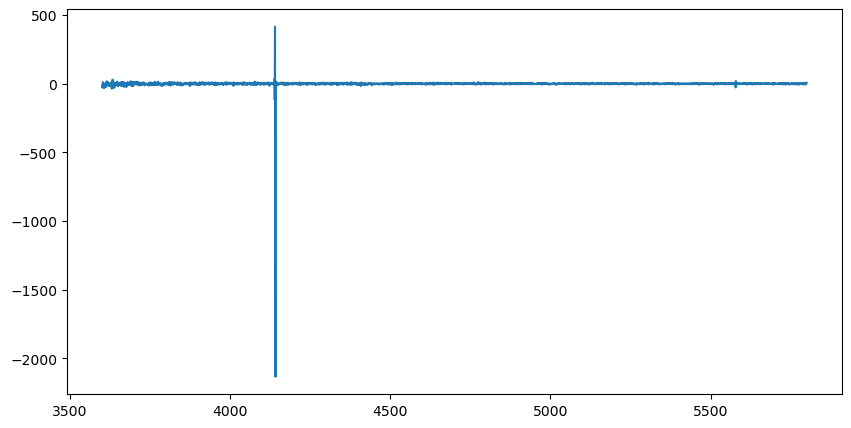

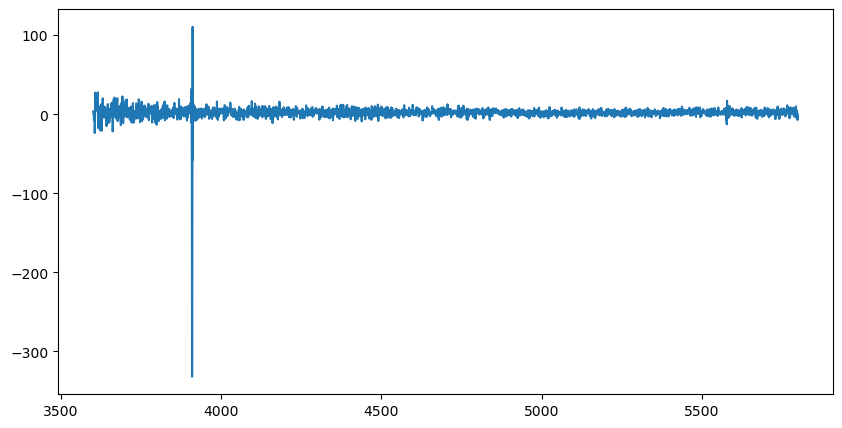

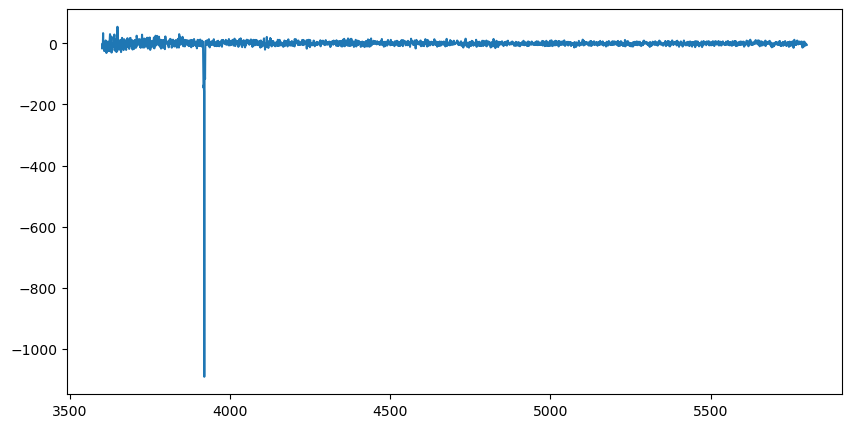

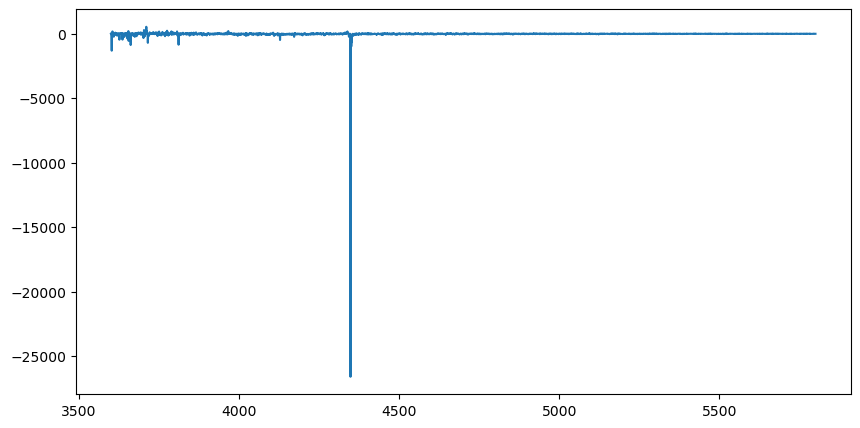

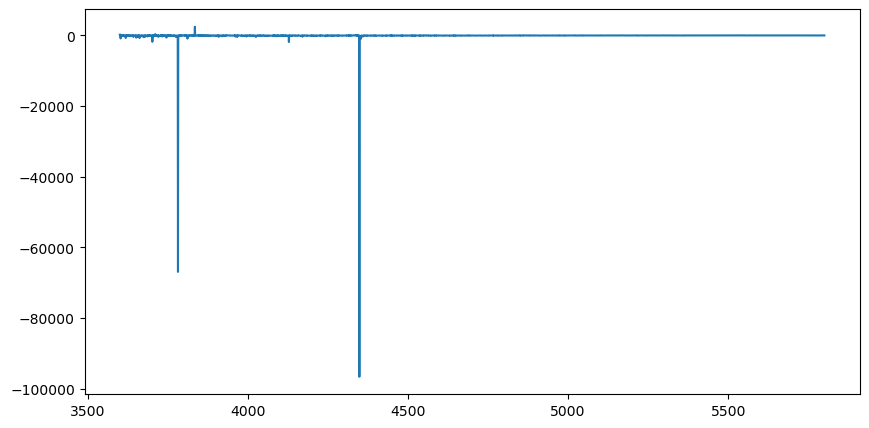

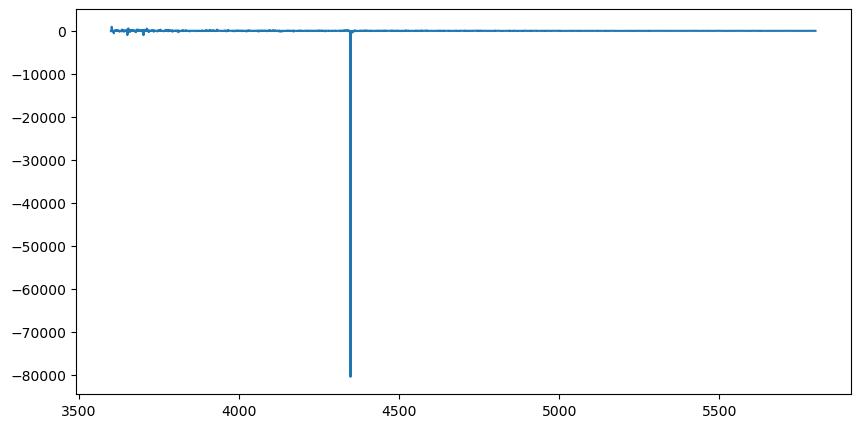

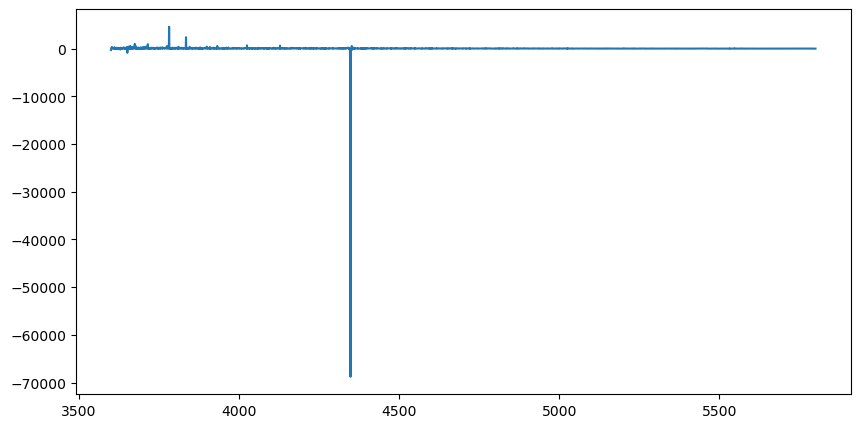

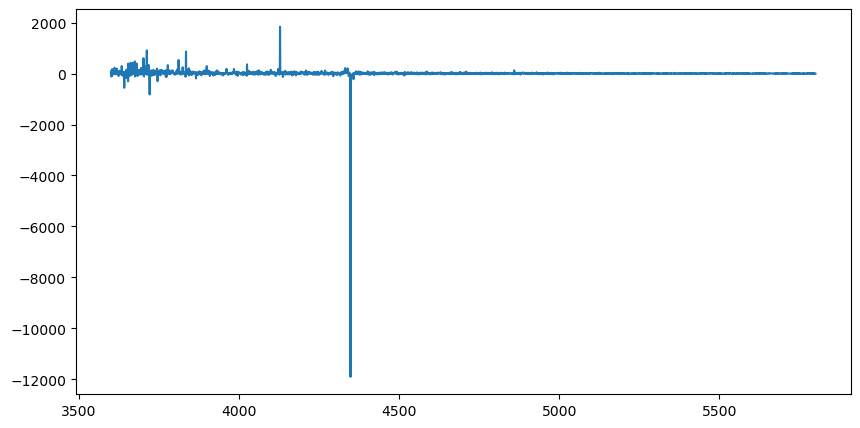

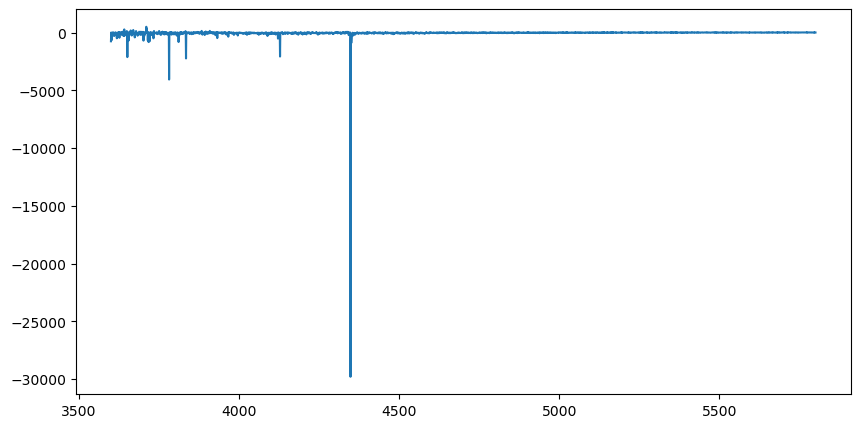

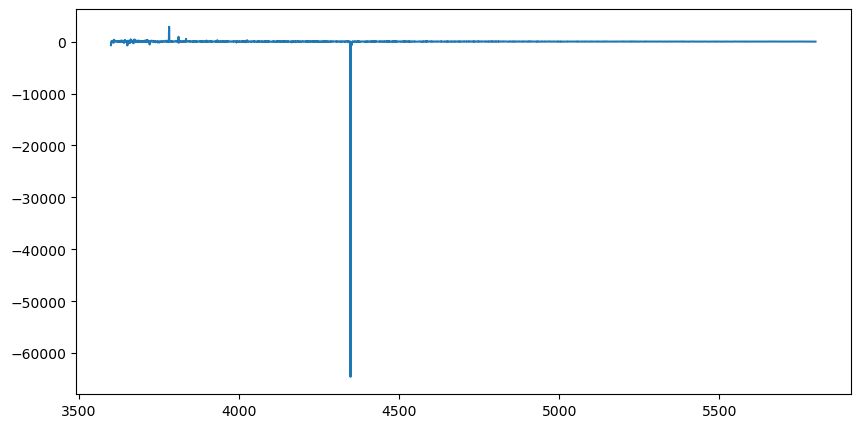

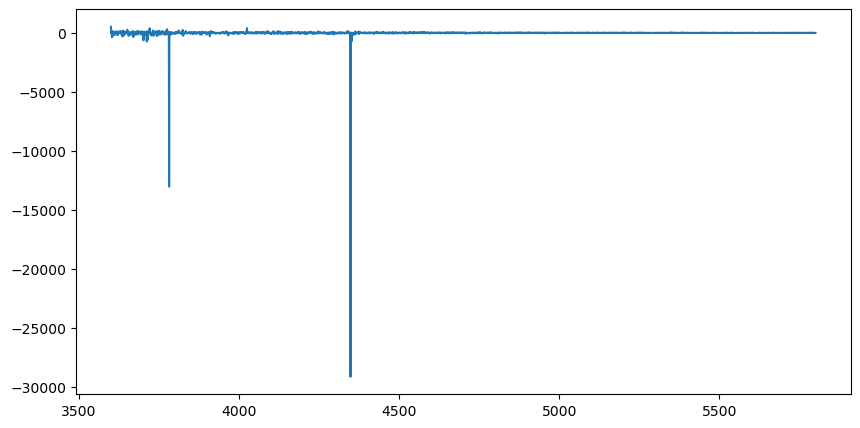

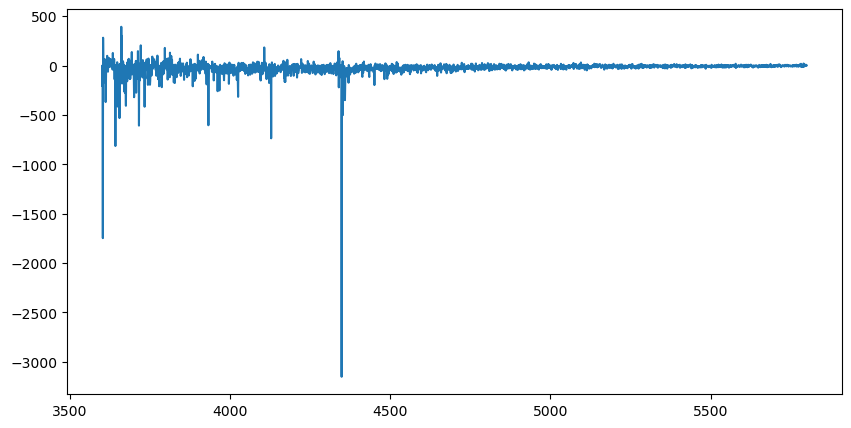

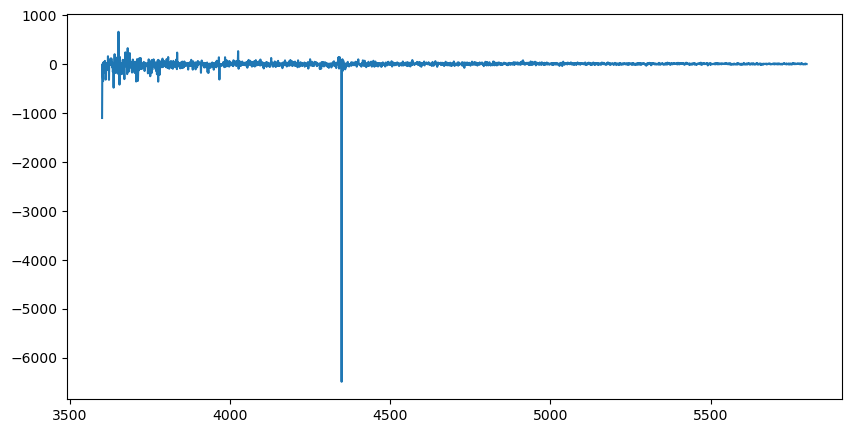

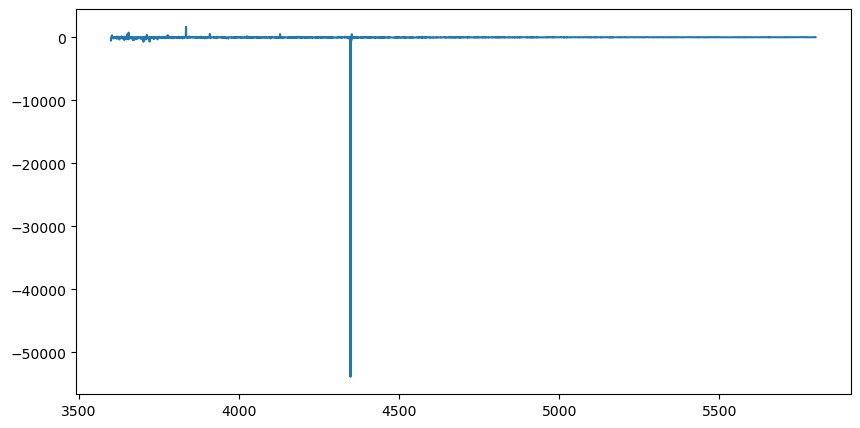

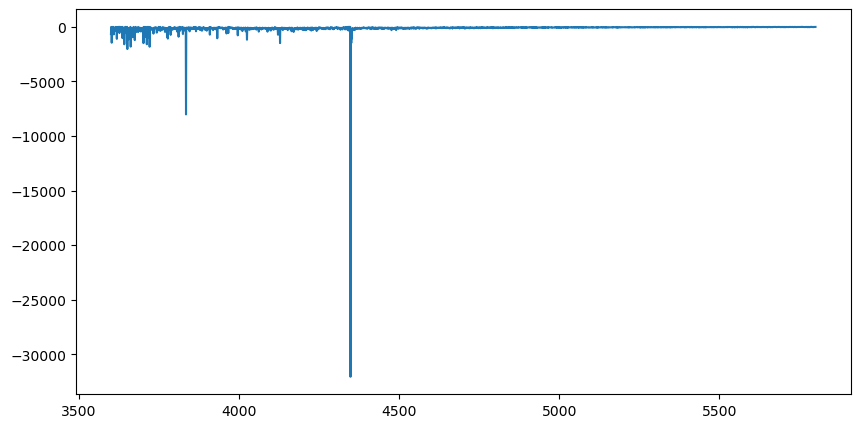

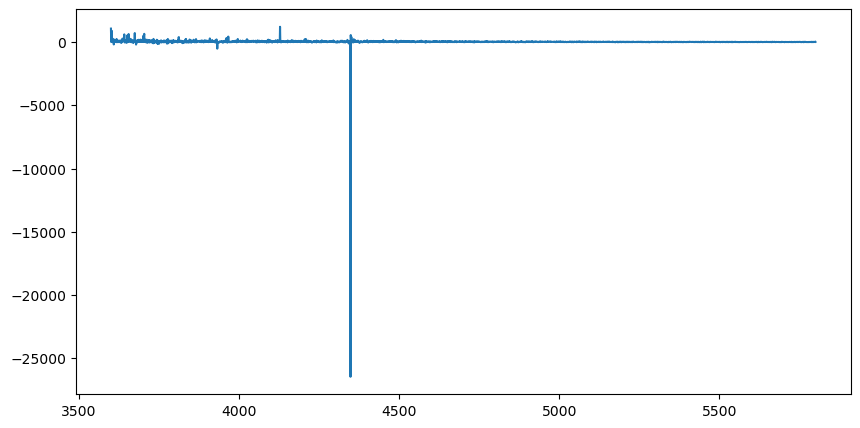

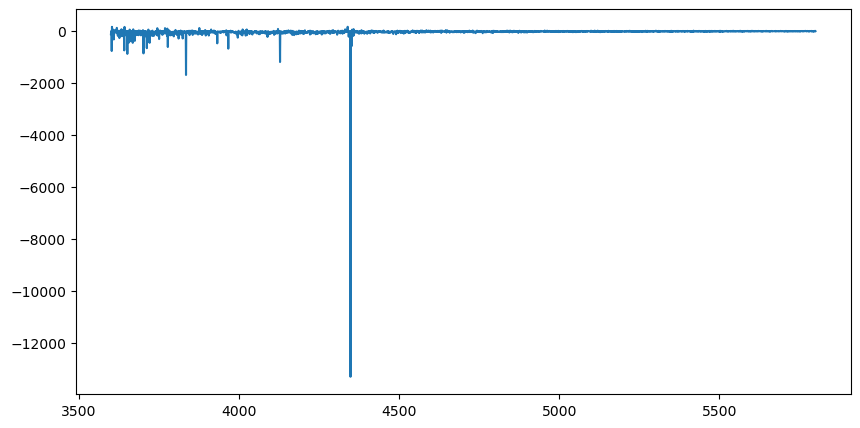

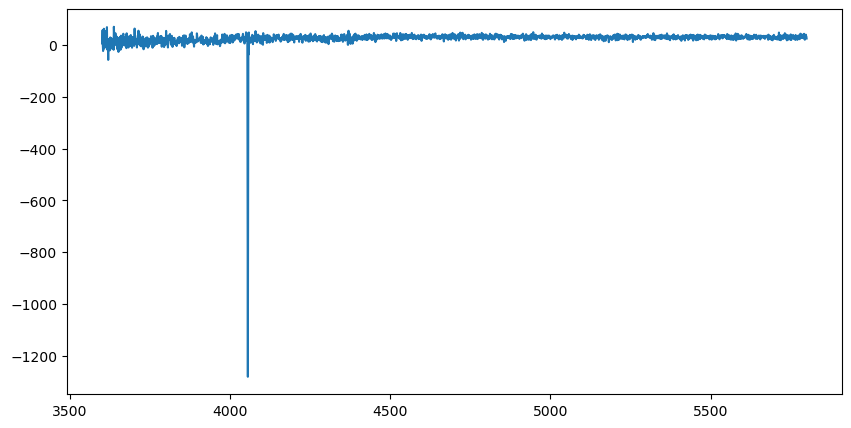

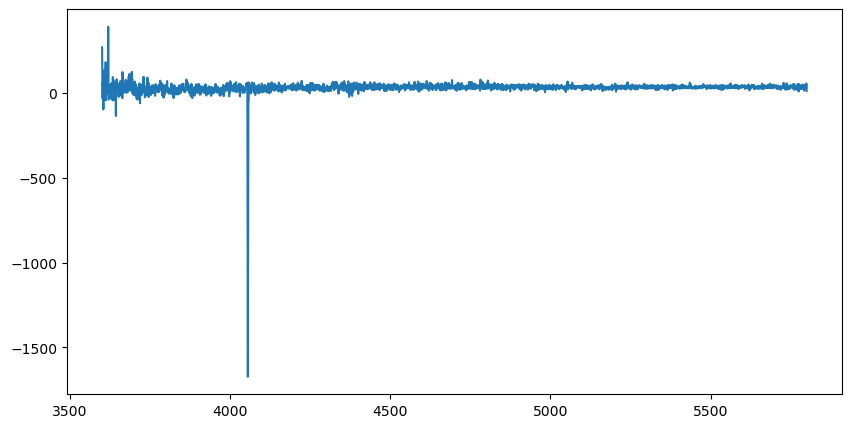

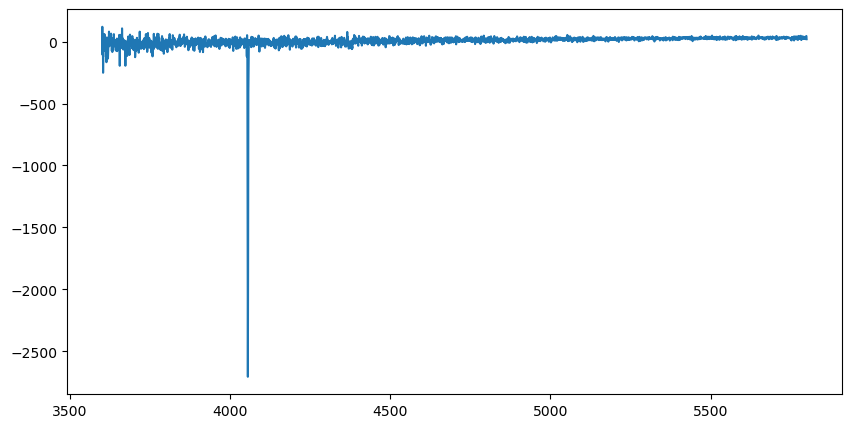

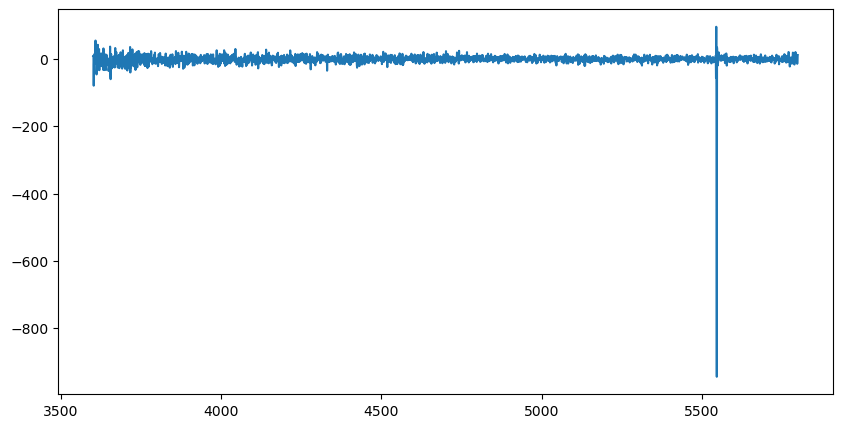

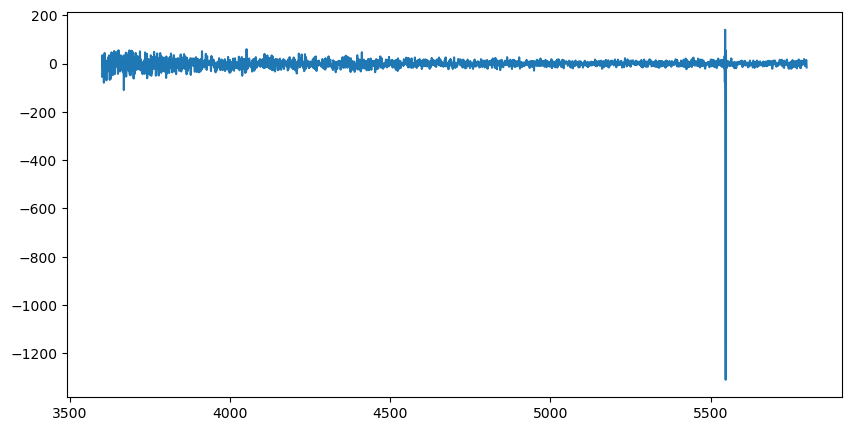

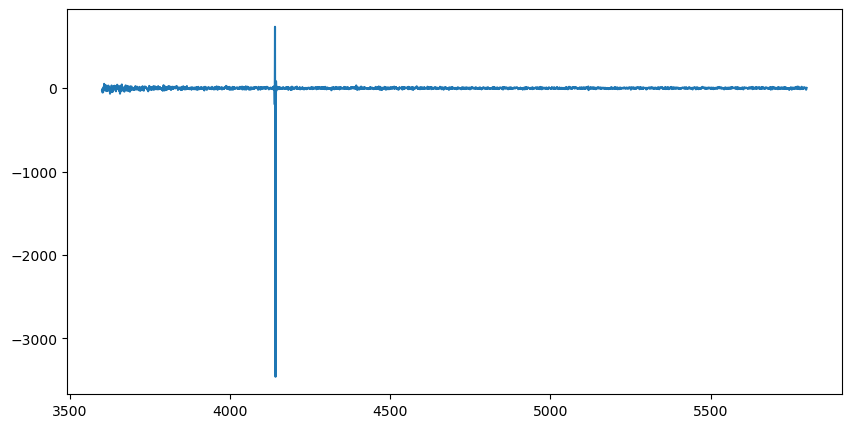

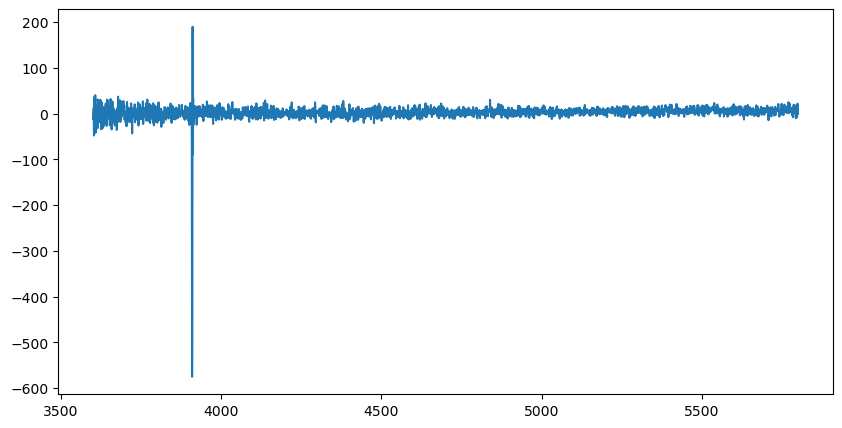

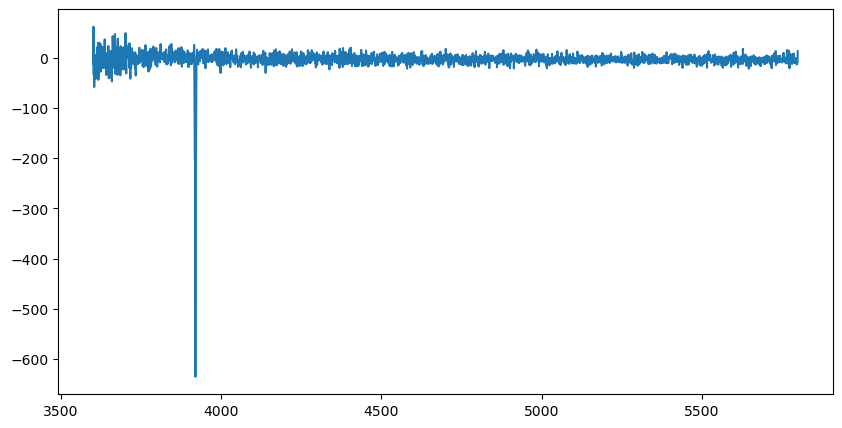

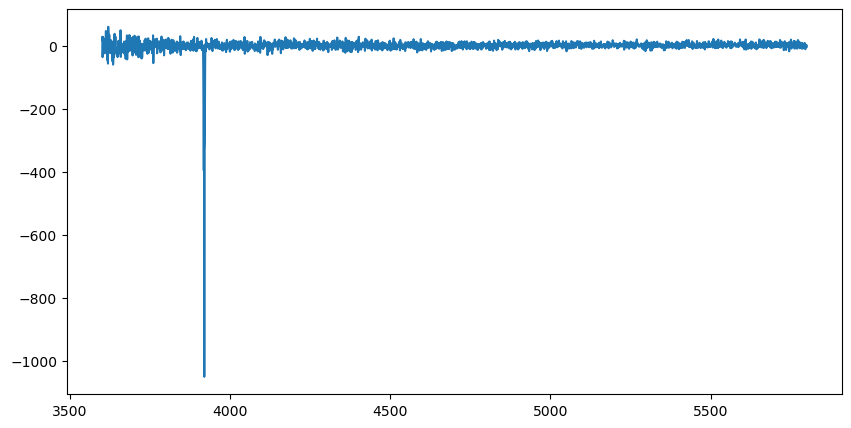

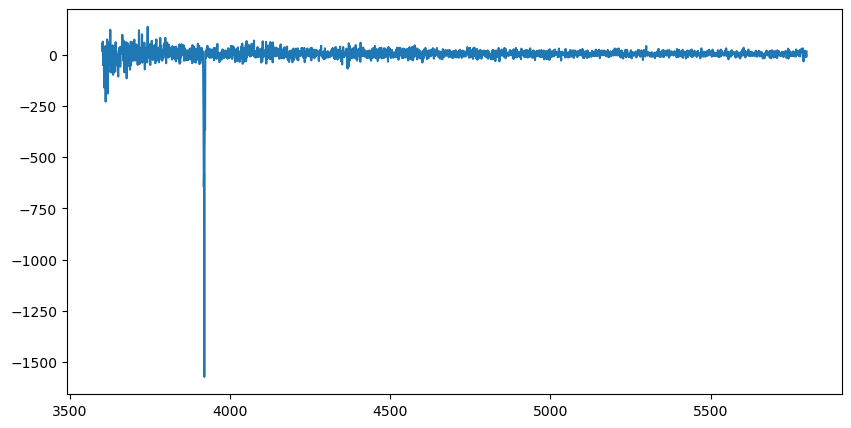

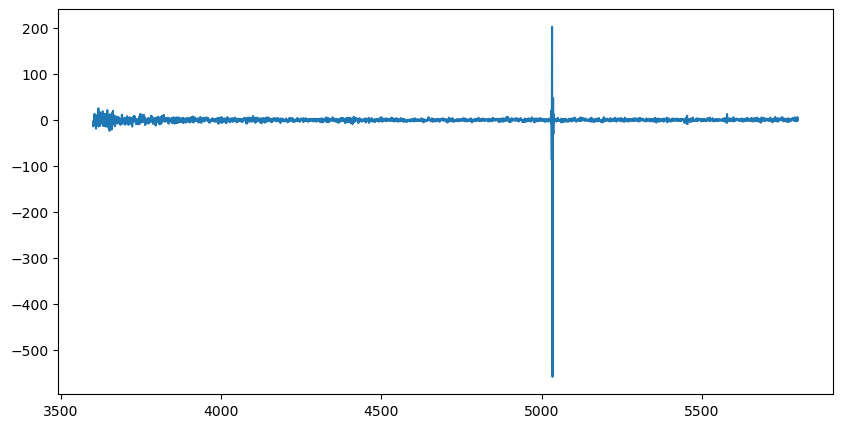

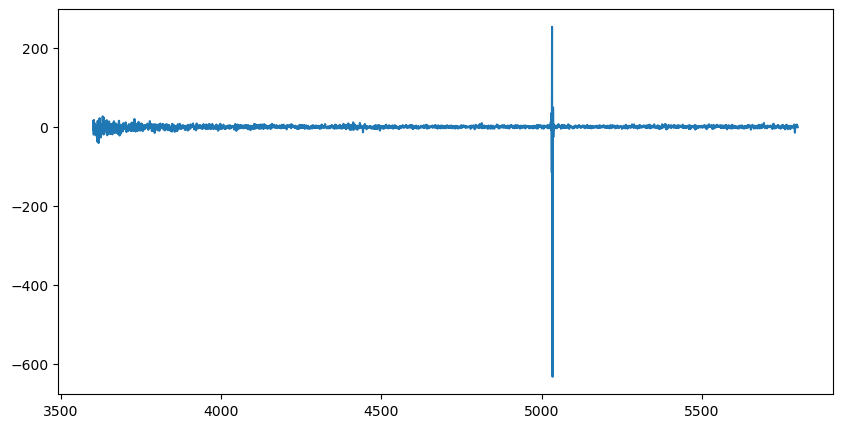

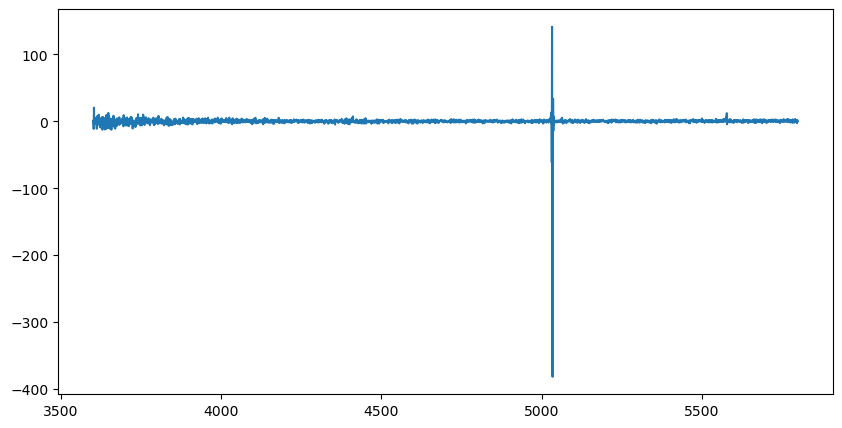

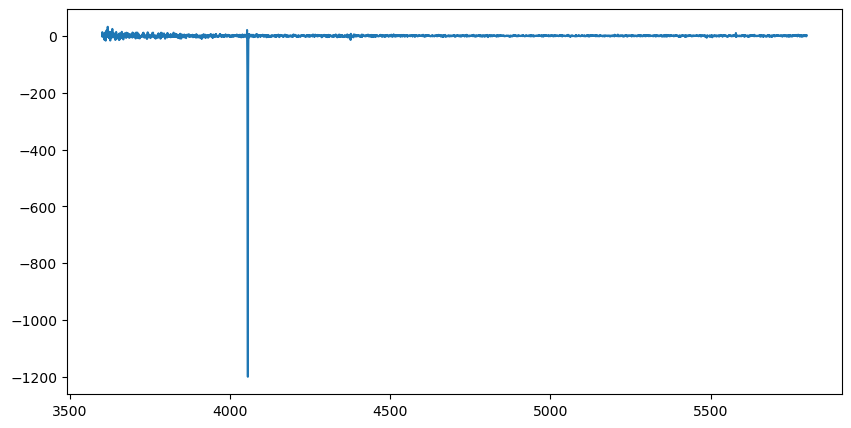

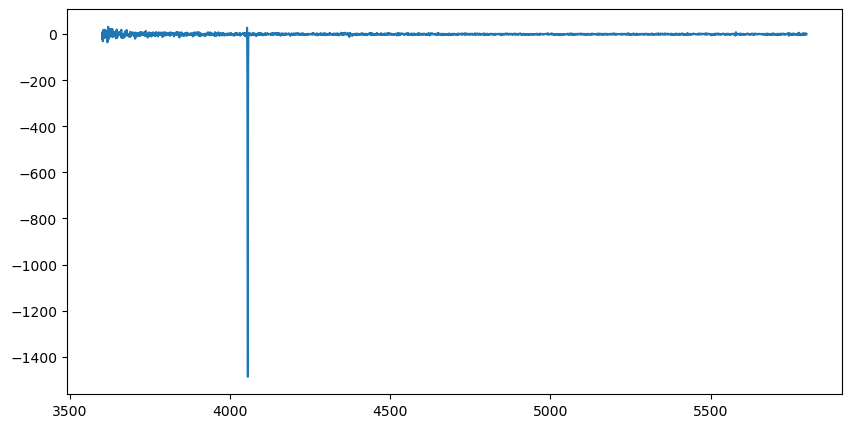

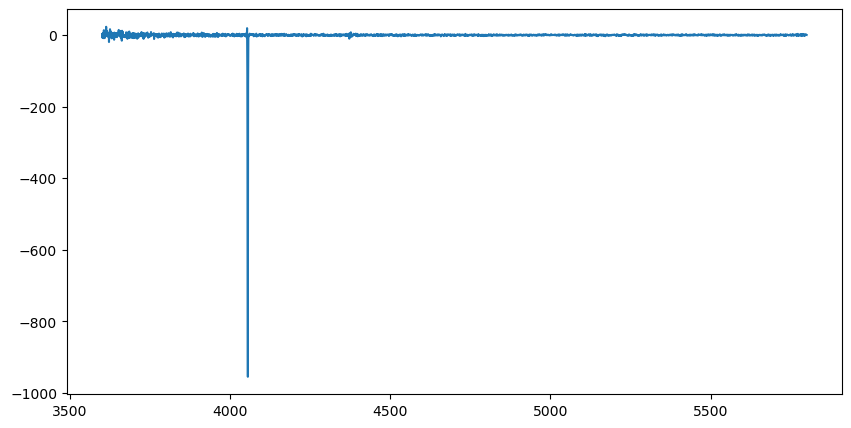

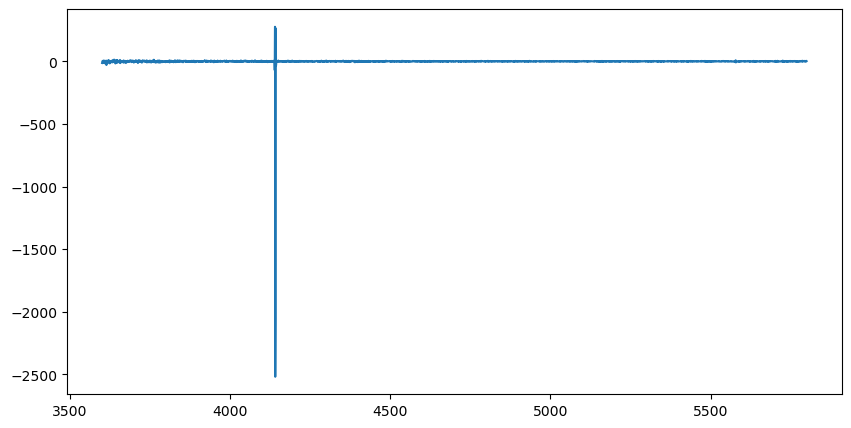

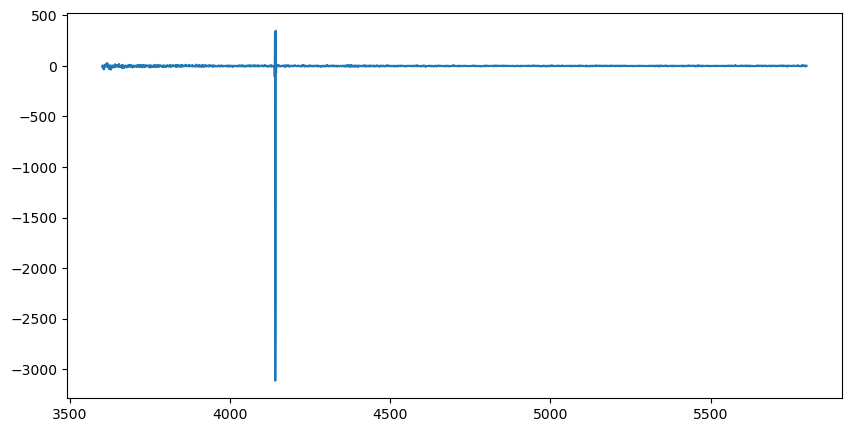

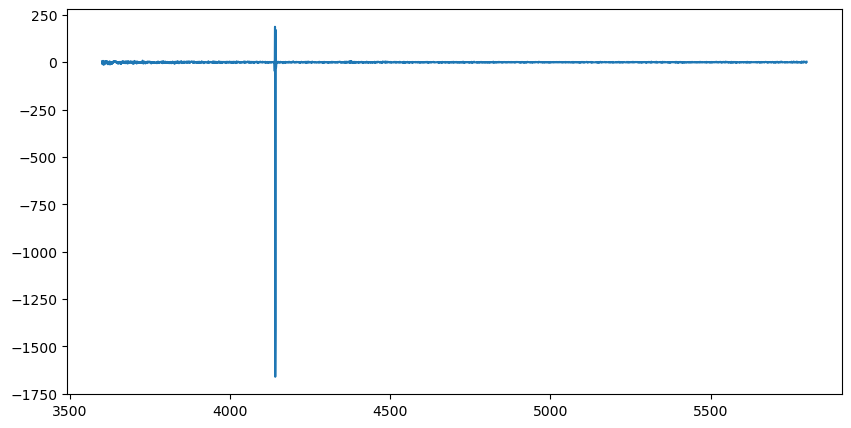

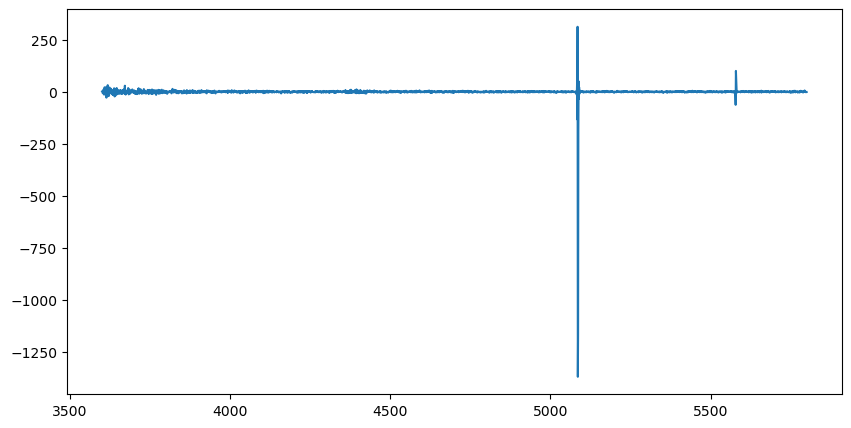

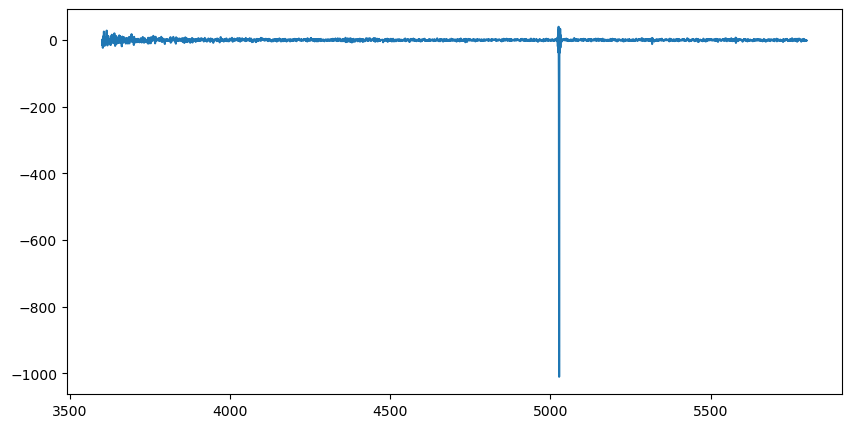

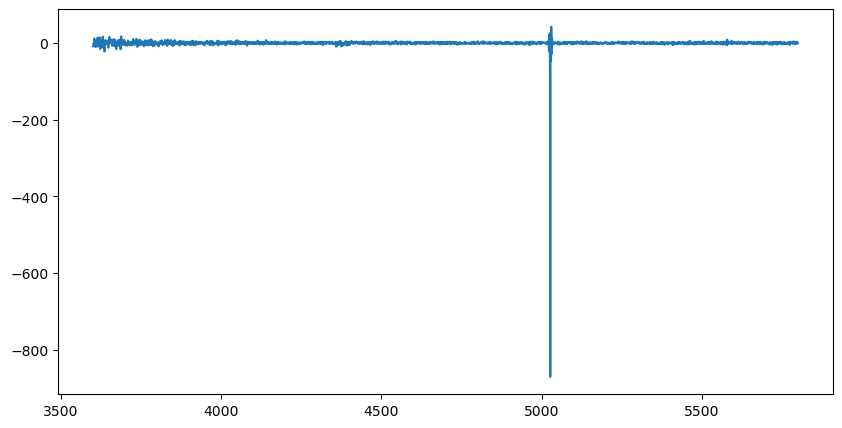

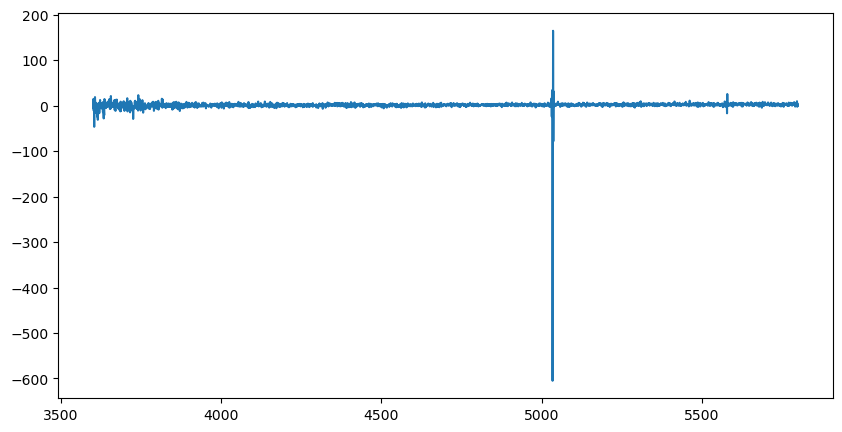

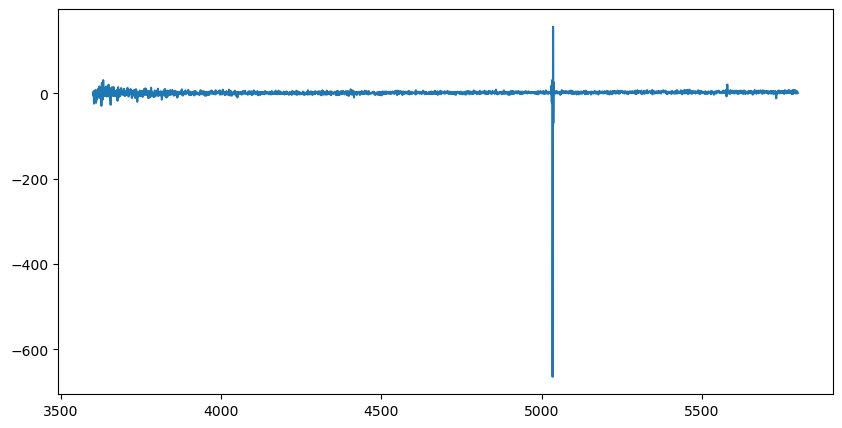

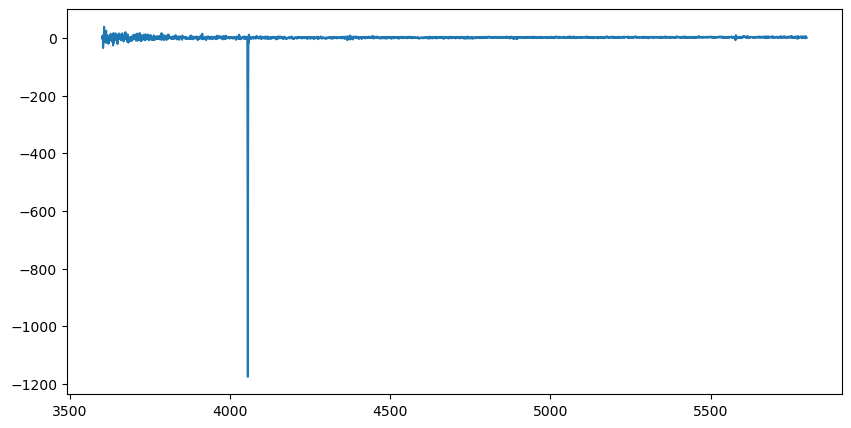

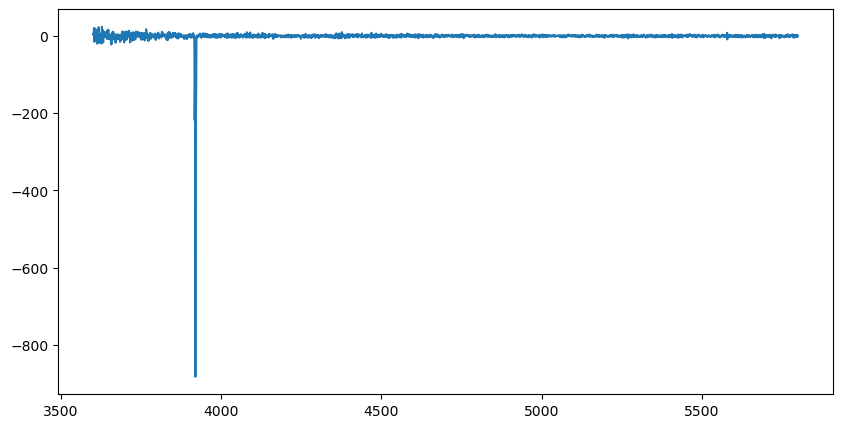

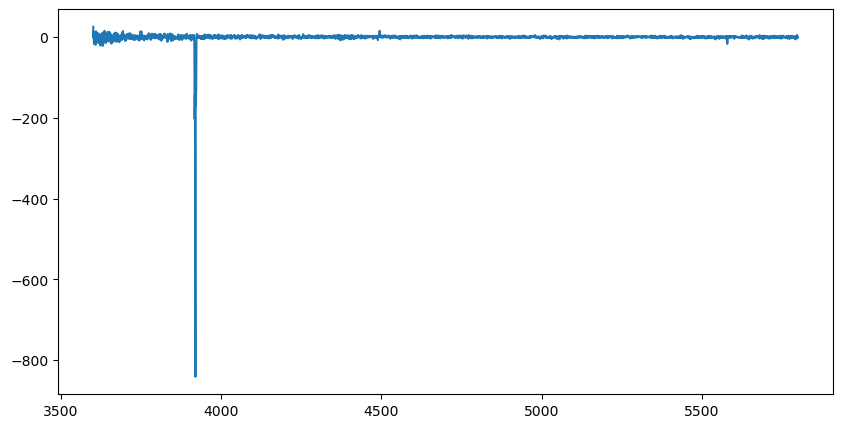

In [11]:
for i in index:
    fig = pl.figure(figsize=(10,5))
    pl.plot(np.array(df_wave), df_spec.iloc[i]['FLUX'])
    pl.show()